<a href="https://colab.research.google.com/github/jpabonl/Metodos_numericos/blob/main/Curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy as sp
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Curva Sigmoide**: La función tiene un comportamiento de escalón

In [ ]:
def sigmoide(x, A, B, C, x0):
  return A+(B-A)/(1+np.ecp(-C*(x-x0)))

In [ ]:
data = np.loadtxt("datos.dat")
x =data[:,0]
y =data[:,1]
param, cov = curve_fit(sigmoide,x , y)
incert = np.sqrt(np.diag(cov))

print(param)
print(incert)
plt.plot(x, y, "*b", label="data exp")

x_fit = np.linspace(x[0], x[-1], 1000, endpoint=True)
plt.plot(x_fit, sigmoide(x_fit, *param), "--r", label="Ajuste")

plt.legend()

plt.show()

# **Ajuste lineal de datos**

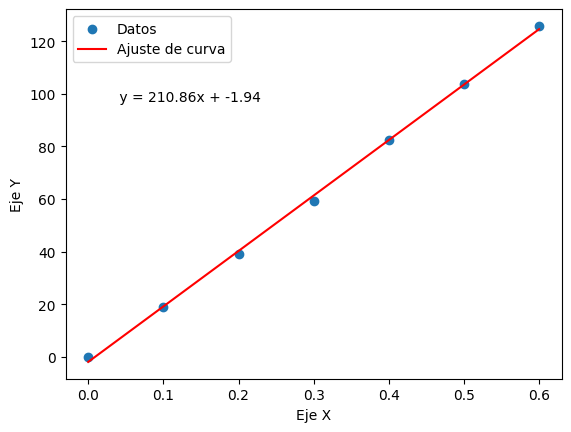

Parámetros ajustados: a = 210.85714225984762, b = -1.942856884026831


In [ ]:
# Leer el archivo Excel
archivo_excel = 'tu_archivo.xlsx'  # Reemplaza 'tu_archivo.xlsx' con la ubicación de tu archivo
hoja_excel = 'Hoja1'  # Reemplaza 'Hoja1' con el nombre de la hoja que deseas procesar

df = pd.read_excel(archivo_excel, sheet_name=hoja_excel)

# Supongamos que tienes tres columnas 'x', 'y', 'error_x', y 'error_y' en tu hoja de Excel
x = df['x'].values
y = df['y'].values
error_x = df['error_x'].values
error_y = df['error_y'].values

# Verificar y eliminar valores infinitos o NaN
valid_indices = np.isfinite(x) & np.isfinite(y) & np.isfinite(error_x) & np.isfinite(error_y)
x = x[valid_indices]
y = y[valid_indices]
error_x = error_x[valid_indices]
error_y = error_y[valid_indices]

# Definir una función de ajuste de curva (por ejemplo, una línea recta)
def modelo_lineal(x, a, b):
    return a * x + b

# Realizar el ajuste de curva
params, covariance = curve_fit(modelo_lineal, x, y)

# Obtener los parámetros ajustados
a, b = params

# Crear una línea de regresión
y_regresion = modelo_lineal(x, a, b)

# Calcular la ecuación de la línea de regresión
ecuacion = f'Ecuación de la línea: y = {a:.2f}x + {b:.2f}'

# Graficar los datos y la línea de regresión con barras de error en ambos ejes
plt.errorbar(x, y, xerr=error_x, yerr=error_y, fmt='o', label='Datos con error')
plt.plot(x, y_regresion, 'r', label='Ajuste de curva')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()

# Agregar la ecuación al gráfico
plt.annotate(ecuación, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)

plt.show()

# Imprimir los parámetros ajustados
print(f"Parámetros ajustados: a = {a}, b = {b}")


# **Ajuste de multiples rectas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Leer el archivo Excel
archivo_excel = 'tu_archivo.xlsx'  # Reemplaza 'tu_archivo.xlsx' con la ubicación de tu archivo
hoja_excel = 'Hoja1'  # Reemplaza 'Hoja1' con el nombre de la hoja que deseas procesar

df = pd.read_excel(archivo_excel, sheet_name=hoja_excel)

# Supongamos que tienes tres columnas 'x', 'y', 'error_x', y 'error_y' en tu hoja de Excel
x = df['x'].values
y = df['y'].values
error_x = df['error_x'].values
error_y = df['error_y'].values

# Verificar y eliminar valores infinitos o NaN
valid_indices = np.isfinite(x) & np.isfinite(y) & np.isfinite(error_x) & np.isfinite(error_y)
x = x[valid_indices]
y = y[valid_indices]
error_x = error_x[valid_indices]
error_y = error_y[valid_indices]

# Definir una función de ajuste de curva (por ejemplo, una línea recta)
def modelo_lineal(x, a, b):
    return a * x + b

# Realizar el ajuste de curva para la primera línea
params1, covariance1 = curve_fit(modelo_lineal, x, y)

# Obtener los parámetros ajustados para la primera línea
a1, b1 = params1

# Realizar el ajuste de curva para la segunda línea (supongamos que tienes otro conjunto de datos en 'x2' y 'y2')
x2 = df['x2'].values
y2 = df['y2'].values
valid_indices2 = np.isfinite(x2) & np.isfinite(y2)
x2 = x2[valid_indices2]
y2 = y2[valid_indices2]
params2, covariance2 = curve_fit(modelo_lineal, x2, y2)
a2, b2 = params2

# Crear una línea de regresión para ambas líneas
y_regresion1 = modelo_lineal(x, a1, b1)
y_regresion2 = modelo_lineal(x2, a2, b2)

# Graficar los datos y las líneas de regresión con barras de error en ambos ejes
plt.errorbar(x, y, xerr=error_x, yerr=error_y, fmt='o', label='Datos con error 1')
plt.errorbar(x2, y2, fmt='s', label='Datos 2')  # Agregar datos sin barras de error para la segunda línea
plt.plot(x, y_regresion1, 'r', label='Ajuste de curva 1')
plt.plot(x2, y_regresion2, 'g', label='Ajuste de curva 2')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()

plt.show()

# Imprimir los parámetros ajustados para ambas líneas
print(f"Parámetros ajustados para la línea 1: a = {a1}, b = {b1}")
print(f"Parámetros ajustados para la línea 2: a = {a2}, b = {b2}")


# **Ajuste de curva exponencial decreciente**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Leer el archivo Excel
archivo_excel = 'tu_archivo.xlsx'  # Reemplaza 'tu_archivo.xlsx' con la ubicación de tu archivo
hoja_excel = 'Hoja1'  # Reemplaza 'Hoja1' con el nombre de la hoja que deseas procesar

df = pd.read_excel(archivo_excel, sheet_name=hoja_excel)

# Supongamos que tienes tres columnas 'x', 'y', 'error_x', y 'error_y' en tu hoja de Excel
x = df['x'].values
y = df['y'].values
error_x = df['error_x'].values
error_y = df['error_y'].values

# Verificar y eliminar valores infinitos o NaN
valid_indices = np.isfinite(x) & np.isfinite(y) & np.isfinite(error_x) & np.isfinite(error_y)
x = x[valid_indices]
y = y[valid_indices]
error_x = error_x[valid_indices]
error_y = error_y[valid_indices]

# Definir una función de ajuste de curva exponencial negativa
def modelo_exponencial(x, a, b, c):
    return a * np.exp(-b * x) + c

# Realizar el ajuste de curva para la primera línea
params1, covariance1 = curve_fit(modelo_exponencial, x, y)

# Obtener los parámetros ajustados para la primera línea
a1, b1, c1 = params1

# Graficar los datos y la línea de regresión con barras de error en ambos ejes
plt.errorbar(x, y, xerr=error_x, yerr=error_y, fmt='o', label='Datos con error 1')
plt.plot(x, modelo_exponencial(x, a1, b1, c1), 'r', label='Ajuste de curva 1')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()

plt.show()

# Imprimir los parámetros ajustados para la línea 1
print(f"Parámetros ajustados para la línea 1: a = {a1}, b = {b1}, c = {c1}")
